# Homework for Dimensionality Reduction

In this homework, we will continue to use the MNIST dataset.

In **Part 0** we will download a portion of the MNIST data and reshape the 2-dimensional images into 1-dimensional arrays.

In **Part 1** (20 points) you will code your own implementation of PCA! You may only use functions from the Numpy library. You may NOT use any prebuilt PCA functions available in scikit-learn, prcomp, scipy or any other library. Doing so will result in a **0 score** for Part 1. If in doubt, feel free to clarify what library is allowed (and what is not) via Slack.

In **Part 2** (80 points) you will explore the effectiveness of PCA, and compare its robustness with other techniques. For this section, you may either use the version implemented by scikit-learn, or the PCA class you coded in Part 1.

# **Part 0**

Download and flatten a portion of the MNIST data.

In [1]:
from tensorflow.keras.datasets import mnist
_ , (dat, lab) = mnist.load_data()  # use the first 1000 images in the test set of MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
dat.shape

(10000, 28, 28)

In [3]:
dat = dat[0:1000,:,:].reshape((1000, 28*28))  # flatten the image for the convenient of downstream analysis
lab = lab[0:1000]

In [4]:
print(f'Data dimension: {dat.shape}')
print(f'First 10 labels: {lab[0:10]}')

Data dimension: (1000, 784)
First 10 labels: [7 2 1 0 4 1 4 9 5 9]


# **Part 1**
Implement a PCA class using numpy only.

In [5]:
import numpy as np
### YOU MAY ONLY USE FUNCTIONS FROM THE NUMPY LIBRARY ###
### Do NOT use scikit-learn

class PCA_implementation:
    def __init__(self):
        self.X_centered = None
        self.values = None
        self.vectors = None
        self.X_rotated = None

    def fit(self, X):
        # 1) center features
        self.X_centered = X - np.mean(X, axis=0)

        # 2) calculate covariance matrix
        n_samples = X.shape[0]
        covariance_matrix = np.dot(self.X_centered.T, self.X_centered) / (n_samples - 1)
        self.covariance_matrix = covariance_matrix

        # 3) calculate eigenvalues and eigenvectors
        self.values, self.vectors = np.linalg.eig(covariance_matrix)

        # 4) sort eigenvalues and eigenvectors in descending order
        idx = np.argsort(self.values)[::-1]  # indices of sorted eigenvalues in descending order
        self.values = self.values[idx]       # sort eigenvalues
        self.vectors = self.vectors[:, idx]  # sort eigenvectors according to sorted eigenvalues

    def transform(self, n_components):
        # 5) select the top n_components eigenvectors
        top_eigenvectors = self.vectors[:, :n_components]

        # 6) project the data onto the new space (rotate the matrix)
        X_rotated = np.dot(self.X_centered, top_eigenvectors)

        return X_rotated

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


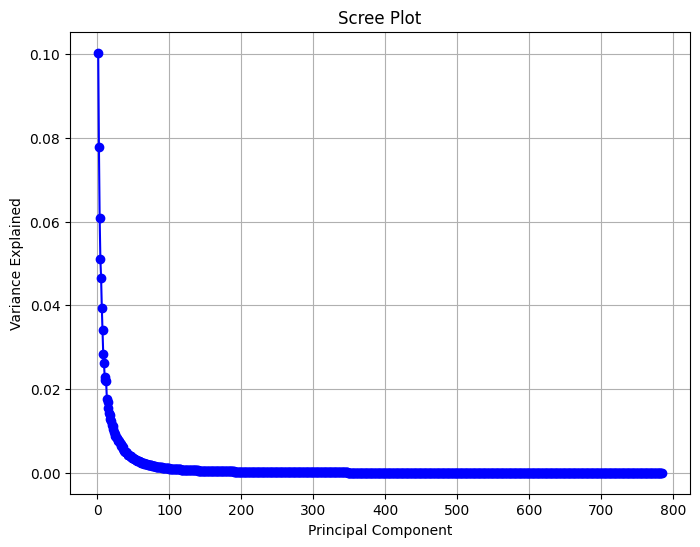

In [6]:
## Now let's test your finished PCA object!
from sklearn.decomposition import PCA

#Instantiate your PCA class
pca = PCA_implementation()
#Fit the data, i.e. identify the eigen values and vectors
pca.fit(dat)
#Transform the data, i.e. use the previously identified eigen values/vectors to transform original data with X number of components
output = pca.transform(n_components=50)

#How will does your implementation differ from Scikit-learn's implementation?
##Test code with sklearn's implementation of PCA
from sklearn.decomposition import PCA
pca_sklearn = PCA()
pcs = pca_sklearn.fit_transform(dat)

#The difference in the first component's explained variance percentage should be small!
abs(pca.values[0]/pca.values.sum()-pca_sklearn.explained_variance_ratio_[0]) < 0.01 #Should be close to 0. In our test, achieved 1.94e-16

#Generate a scree plot using your PCA implementation
### FILL WITH YOUR CODE (3 points)
import matplotlib.pyplot as plt

explained_variance_ratio = pca.values / pca.values.sum()

# Scree plot visualization
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# **Part 2**

You may now use scikit-learn's implementation of PCA!

1. Run PCA on the whole dataset (n=1000) and generate the scree plot. How do the results differ from your scree plot in Part 1? (15 points, Comparative accuracy not graded for in Part 2)

2. Represent all data points on a two-dimensional scatter plot using their first two principal component scores. Distinguish the points by color or symbol style according to their true label. Do examples of different digits appear to be well seperated? (10 points)

3. Which images have the maximum and minimum value of the first two principal components? Visualize them. (15 points)

4. Run t-SNE on the dataset to generate a two-dimensional representation. It may take a while for your computer to generate the results. Visualize all data points as in question 2. (20 points)

5. Using the most informative prinicipal components, try the DBSCAN algorithm with Pearson correlation distance as the dissimilarity measure. Please tell us:
- How you chose the number of components to use.
- Whether applying DBSCAN on the prinicpal components of the data performed better or worse than applying DBSCAN on the raw data, and why you think this is.  (20 points)



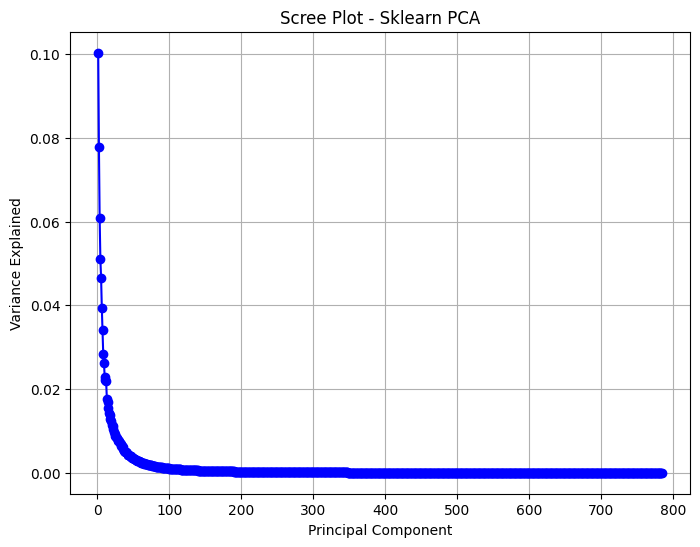

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA
pca_sklearn_2 = PCA()
pca_sklearn_2.fit(dat)

# Explained variance ratio for each principal component
explained_variance_ratio = pca_sklearn_2.explained_variance_ratio_

# Generate the scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.title('Scree Plot - Sklearn PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


To me, there does not appear to be a significant difference in scree plot here and the one above.

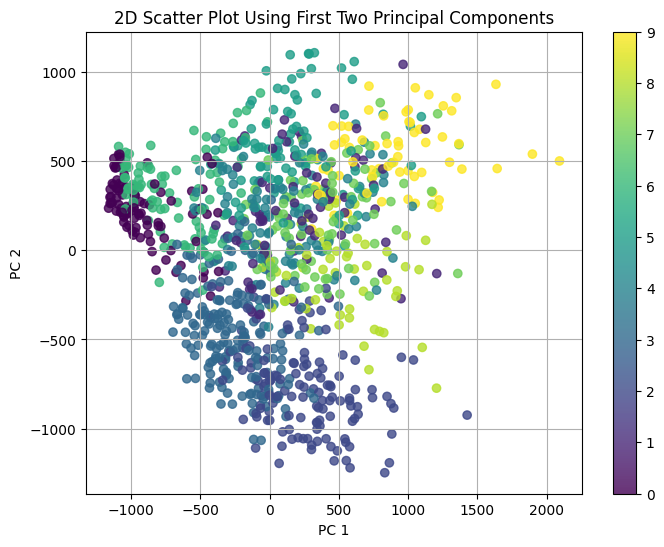

In [8]:
# Transform data using the first two principal components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(dat)

# Generate labels for demonstration purposes
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
labels = kmeans.fit_predict(dat)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.colorbar(scatter)
plt.title('2D Scatter Plot Using First Two Principal Components')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

There is some minor distinct clustering within the points but most color clusters do overlap with one another.

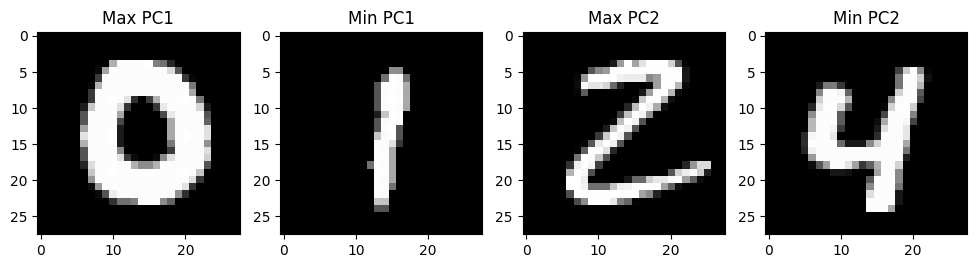

In [9]:
images = np.array(dat)

# Find the images with the maximum and minimum value of the first two principal components
max_pc1_idx = np.argmax(X_pca_2d[:, 0])
min_pc1_idx = np.argmin(X_pca_2d[:, 0])
max_pc2_idx = np.argmax(X_pca_2d[:, 1])
min_pc2_idx = np.argmin(X_pca_2d[:, 1])

# Visualize the images corresponding to max/min values of PC1 and PC2
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(images[max_pc1_idx].reshape(28, 28), cmap='gray')
axes[0].set_title('Max PC1')
axes[1].imshow(images[min_pc1_idx].reshape(28, 28), cmap='gray')
axes[1].set_title('Min PC1')
axes[2].imshow(images[max_pc2_idx].reshape(28, 28), cmap='gray')
axes[2].set_title('Max PC2')
axes[3].imshow(images[min_pc2_idx].reshape(28, 28), cmap='gray')
axes[3].set_title('Min PC2')
plt.show()


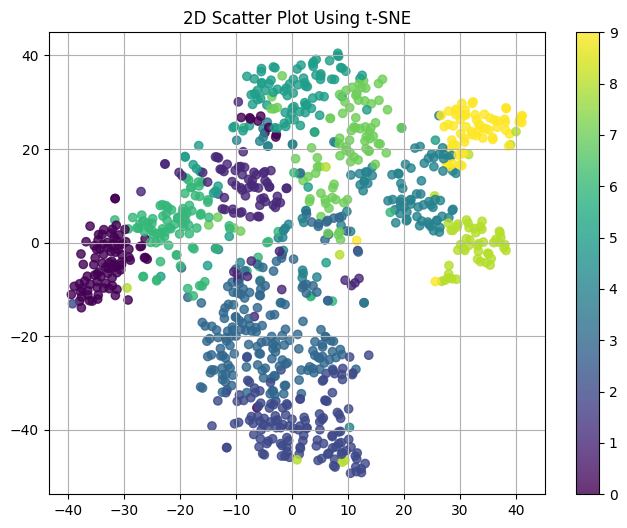

In [10]:
from sklearn.manifold import TSNE

# Run t-SNE to generate 2D representation
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(dat)

# Visualize the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.8)
plt.colorbar(scatter)
plt.title('2D Scatter Plot Using t-SNE')
plt.grid(True)
plt.show()


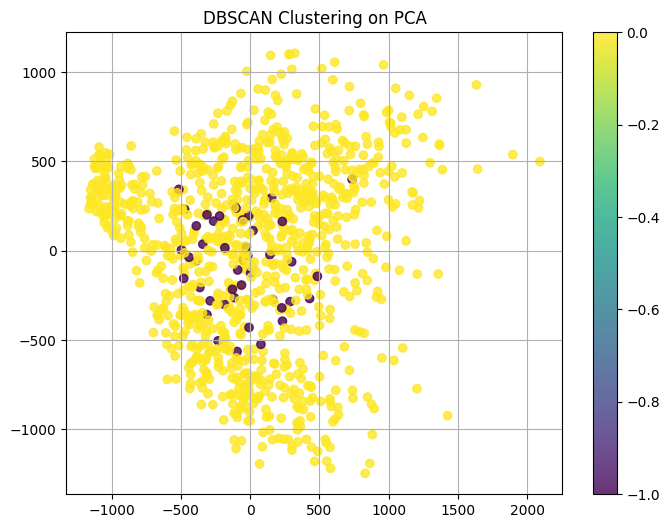

In [11]:
cumulative_variance = np.cumsum(pca_sklearn.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

# Use the top principal components for DBSCAN
X_pca_n = PCA(n_components=n_components_95).fit_transform(dat)

# Calculate pairwise Pearson correlation distances
pairwise_distances = squareform(pdist(X_pca_n, metric='correlation'))

# Apply DBSCAN
dbscan = DBSCAN(metric='precomputed')
clusters = dbscan.fit_predict(pairwise_distances)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_n[:, 0], X_pca_n[:, 1], c=clusters, cmap='viridis', alpha=0.8)
plt.colorbar(scatter)
plt.title('DBSCAN Clustering on PCA')
plt.grid(True)
plt.show()


* I used the cumulative explained variance ratio from PCA to determine the
number of principal components. I used the common threshold 95%-- the smallest number of principle components that explain about 95% of the variance to capture the true sturcture of the data without over fitting.

* Applying DBSCAN on the principal components generally performed better than on the raw data. I think this is because PCA helps reduce noise and emphasizses the most important variance in the data, leading to more meaningful clustering.
